<a href="https://colab.research.google.com/github/hiprasasti/Customer-Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)

# **Import Files**

## **Aisles**

In [ ]:
url = 'https://drive.google.com/file/d/1Tef5EIeW-glO75LvtT3WAaOJO7xMD0Kc/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
aisles = pd.read_csv(url)
aisles.head()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://drive.google.com/uc?id=1Tef5EIeW-glO75LvtT3WAaOJO7xMD0Kc


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


## **Department**

In [ ]:
url = 'https://drive.google.com/file/d/10GJoF6QhTaR6cGJkSgEeFR1W4Qdmbi9J/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
department = pd.read_csv(url)
department.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://drive.google.com/uc?id=10GJoF6QhTaR6cGJkSgEeFR1W4Qdmbi9J


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
department

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## **Product**


In [ ]:
url = 'https://drive.google.com/file/d/1Hmy9eoUudksuciRAikMcedhLIOrhor8B/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
product = pd.read_csv(url)
product.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://drive.google.com/uc?id=1Hmy9eoUudksuciRAikMcedhLIOrhor8B


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


## **Order**

In [ ]:
url = 'https://drive.google.com/file/d/1Phzwv5ZUe9jpX7tcJk9AJmQVbwMP6v6e/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
print(url)
order = pd.read_parquet(url, columns = ['order_id', 'user_id','days_since_prior_order'])
order = order[order['user_id'] <= 100000]
print(order.shape)

order.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://drive.google.com/uc?id=1Phzwv5ZUe9jpX7tcJk9AJmQVbwMP6v6e
(1665742, 3)


,order_id,user_id,days_since_prior_order
0,2539329,1,NaN
1,2398795,1,15.0
2,473747,1,21.0
3,2254736,1,29.0
4,431534,1,28.0


In [ ]:
order

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,days_since_prior_order
0,2539329,1,NaN
1,2398795,1,15.0
2,473747,1,21.0
3,2254736,1,29.0
4,431534,1,28.0
...,...,...,...
1665737,2159051,100000,10.0
1665738,1844720,100000,8.0
1665739,2433517,100000,30.0
1665740,2104152,100000,30.0


In [ ]:
order_prior_files= ['https://drive.google.com/file/d/1fYRM-SCow7k0vRO3YPL8KynElAJla-yB/view?usp=sharing',
                    'https://drive.google.com/file/d/1nvJrxLTtHJbUmy0uLVa4PuGfKeKSOrP5/view?usp=sharing']

for i,url in enumerate(order_prior_files):
  print(i,url)
  order_prior_files[i] = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  print(order_prior_files[i])

df = pd.concat((pd.read_parquet(f, columns= ['order_id', 'product_id']) for f  in order_prior_files))
print(df.shape)
df.head()

0 https://drive.google.com/file/d/1fYRM-SCow7k0vRO3YPL8KynElAJla-yB/view?usp=sharing
https://drive.google.com/uc?id=1fYRM-SCow7k0vRO3YPL8KynElAJla-yB
1 https://drive.google.com/file/d/1nvJrxLTtHJbUmy0uLVa4PuGfKeKSOrP5/view?usp=sharing
https://drive.google.com/uc?id=1nvJrxLTtHJbUmy0uLVa4PuGfKeKSOrP5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(32434489, 2)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
32434484,3421083,39678
32434485,3421083,11352
32434486,3421083,4600
32434487,3421083,24852


# **Clean Up Data**

In [ ]:
product = pd.merge(product,aisles, how = 'inner', on = 'aisle_id')
product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes
...,...,...,...,...,...
49683,47769,Peas and Potatoe Roti Paratha,76,6,indian foods
49684,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6,indian foods
49685,48480,Punjab Eggplant,76,6,indian foods
49686,48830,Pav Bhaji Mashed Vegetable Curry,76,6,indian foods


In [ ]:
product = pd.merge(product,department, how = 'inner', on = 'department_id')
product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [ ]:
productdata = product[['product_id', 'product_name', 'aisle','department']]
print(productdata.shape)

(49688, 4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
productdata

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle,department
0,1,Chocolate Sandwich Cookies,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,cookies cakes,snacks
2,102,Danish Butter Cookies,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,cookies cakes,snacks
...,...,...,...,...
49683,22827,Organic Black Mission Figs,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,bulk dried fruits vegetables,bulk


In [ ]:
# Main df
df = pd.merge(df,productdata, how = 'inner', on = 'product_id')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,aisle,department
0,2,33120,Organic Egg Whites,eggs,dairy eggs
1,26,33120,Organic Egg Whites,eggs,dairy eggs
2,120,33120,Organic Egg Whites,eggs,dairy eggs
3,327,33120,Organic Egg Whites,eggs,dairy eggs
4,390,33120,Organic Egg Whites,eggs,dairy eggs
...,...,...,...,...,...
32434484,3265099,43492,Gourmet Burger Seasoning,spices seasonings,pantry
32434485,3361945,43492,Gourmet Burger Seasoning,spices seasonings,pantry
32434486,3267201,33097,Piquillo & Jalapeno Bruschetta,canned jarred vegetables,canned goods
32434487,3393151,38977,Original Jerky,missing,missing


In [ ]:
df = pd.merge(df,order, how = 'inner', on = 'order_id')
print(df.shape)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(15806355, 7)


,order_id,product_id,product_name,aisle,department,user_id,days_since_prior_order
0,120,33120,Organic Egg Whites,eggs,dairy eggs,23750,10.0
1,120,41273,Broccoli Florets,packaged vegetables fruits,produce,23750,10.0
2,120,40545,Berry Medley,frozen produce,frozen,23750,10.0
3,120,28204,Organic Fuji Apple,fresh fruits,produce,23750,10.0
4,120,26604,Organic Blackberries,fresh fruits,produce,23750,10.0
...,...,...,...,...,...,...,...
15806350,1450675,45236,Mini Chocolate Cupcakes,bakery desserts,bakery,5164,9.0
15806351,2415712,11569,Absolutely Ageless Restorative Night Cream,facial care,personal care,99531,4.0
15806352,2555436,11569,Absolutely Ageless Restorative Night Cream,facial care,personal care,67978,NaN
15806353,2666238,31530,Disinfecting Toilet Bowl Cleaner,cleaning products,household,51836,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15806355 entries, 0 to 15806354
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   product_name            object 
 3   aisle                   object 
 4   department              object 
 5   user_id                 int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 964.7+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id                        0
product_id                      0
product_name                    0
aisle                           0
department                      0
user_id                         0
days_since_prior_order    1009775
dtype: int64

In [ ]:
# Check Typo
for col in ['aisle', 'department']:
  print(df[col].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fresh fruits                  1771043
fresh vegetables              1671762
packaged vegetables fruits     862401
yogurt                         709460
packaged cheese                477640
                               ...   
eye ear care                     4335
baby bath body care              4215
baby accessories                 4036
beauty                           2916
frozen juice                     2299
Name: aisle, Length: 134, dtype: int64
produce            4623611
dairy eggs         2637124
snacks             1403612
beverages          1307701
frozen             1088954
pantry              913953
bakery              575428
canned goods        522907
deli                515928
dry goods pasta     422087
household           358217
meat seafood        346860
breakfast           346047
personal care       218192
babies              206463
international       131457
alcohol              73539
pets                 46334
missing              33685
other                17490
bul

# **Exploratory Data Analysis**

In [ ]:
datadf = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(datadf.shape)

(15806355, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datadf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,aisle,department,user_id,days_since_prior_order
0,120,33120,Organic Egg Whites,eggs,dairy eggs,23750,10.0
1,120,41273,Broccoli Florets,packaged vegetables fruits,produce,23750,10.0
2,120,40545,Berry Medley,frozen produce,frozen,23750,10.0
3,120,28204,Organic Fuji Apple,fresh fruits,produce,23750,10.0
4,120,26604,Organic Blackberries,fresh fruits,produce,23750,10.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                 product_name  order_id
3625                   Banana    230669
3424   Bag of Organic Bananas    184594
31544    Organic Strawberries    127821
28489    Organic Baby Spinach    118742
29933    Organic Hass Avocado    105395
28453         Organic Avocado     86797
22137             Large Lemon     74282
42415            Strawberries     69205
23136                   Limes     68597
30992     Organic Raspberries     67327
32099      Organic Whole Milk     66706
32186    Organic Yellow Onion     55826
29638          Organic Garlic     54304
32225        Organic Zucchini     51206
28654     Organic Blueberries     48395


<ipython-input-24-47961ca2bad1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp, x="product_name", y="order_id", palette=colors)


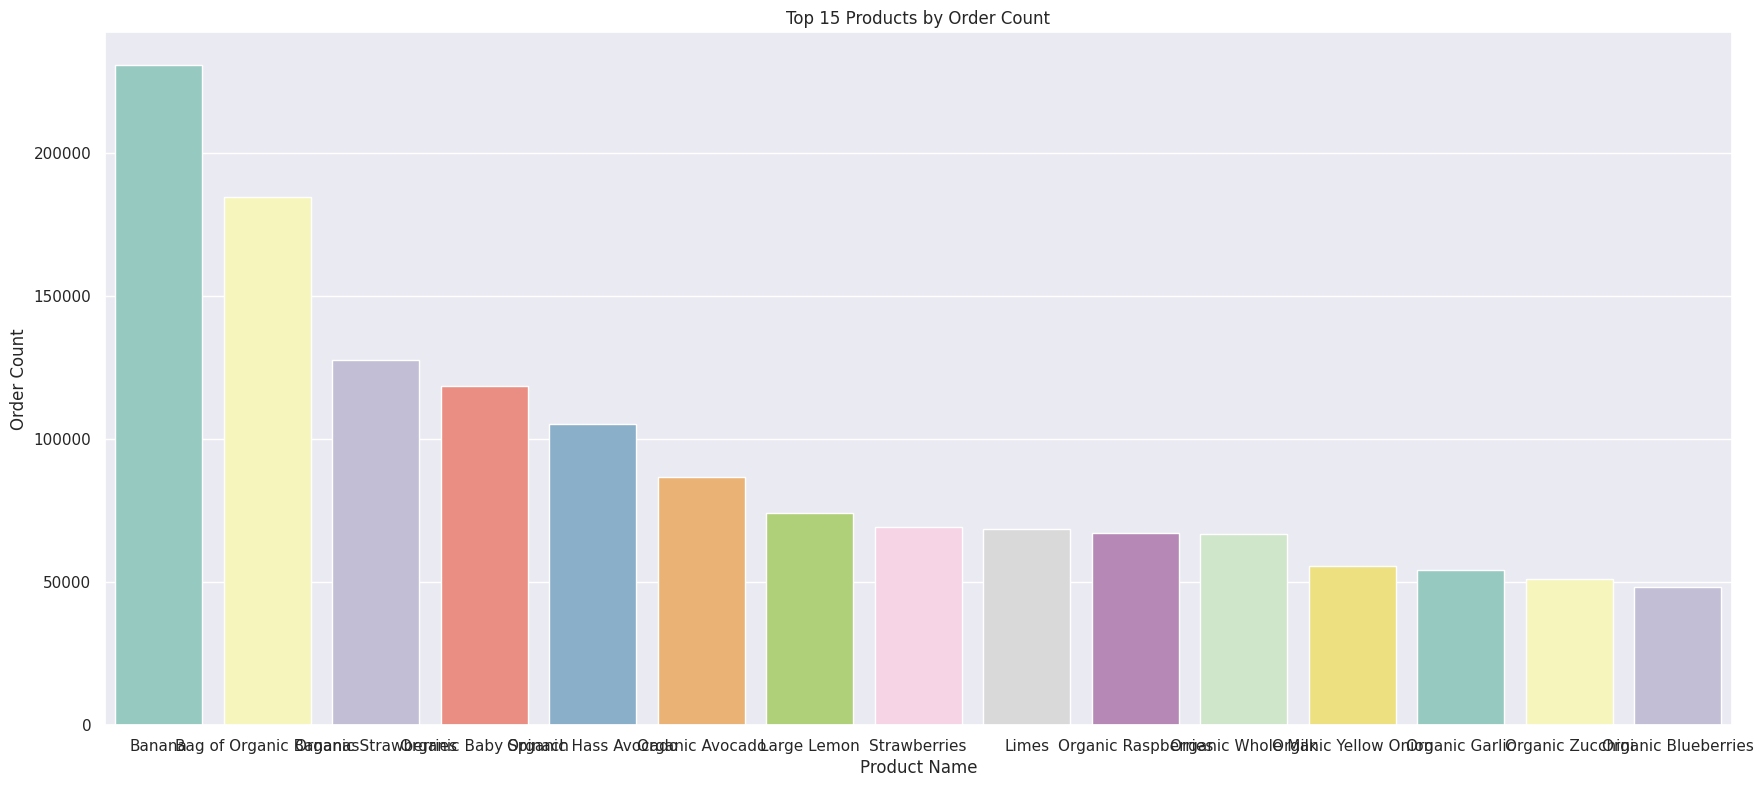

In [ ]:
# Quantity Sold Each
temp = datadf.groupby('product_name', as_index=False)['order_id'].count().sort_values(by = 'order_id', ascending=False).head(15)
print(temp)

# Set a color palette (adjust the palette name as needed)
colors = sns.color_palette("Set3", n_colors=len(temp))

sns.set(rc={'figure.figsize':(21,9)})
sns.barplot(data=temp, x="product_name", y="order_id", palette=colors)
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.title('Top 15 Products by Order Count')
plt.show()

# Fruit and organic vegetables dominate order


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                             aisle  order_id
50                    fresh fruits   1771043
53                fresh vegetables   1671762
98      packaged vegetables fruits    862401
133                         yogurt    709460
93                 packaged cheese    477640
83                            milk    431510
131  water seltzer sparkling water    407179
25                  chips pretzels    350230
119                soy lactosefree    312000
11                           bread    284026
110                   refrigerated    281134
62                  frozen produce    256019
71                   ice cream ice    241616
32                        crackers    223314
42             energy granola bars    222461


<ipython-input-25-a4d147192d7d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp, x="aisle", y="order_id", palette=colors)


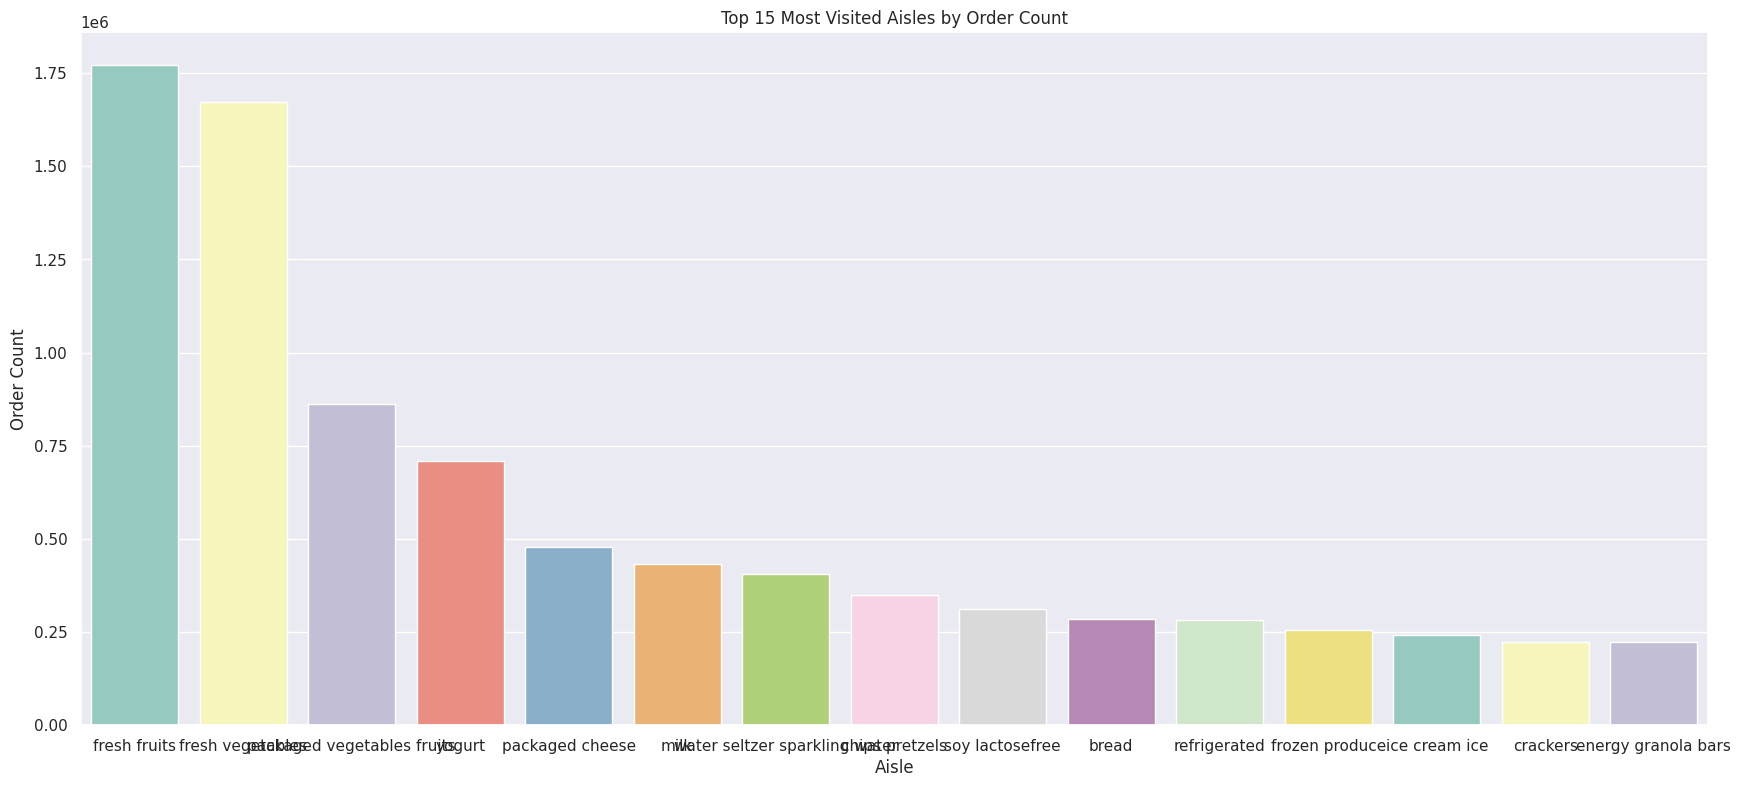

In [ ]:
# Quantity Sold Each
temp = datadf.groupby('aisle', as_index=False)['order_id'].count().sort_values(by = 'order_id', ascending=False).head(15)
print(temp)

# Set a color palette (adjust the palette name as needed)
colors = sns.color_palette("Set3", n_colors=len(temp))

sns.set(rc={'figure.figsize':(21,9)})
sns.barplot(data=temp, x="aisle", y="order_id", palette=colors)
plt.xlabel('Aisle')
plt.ylabel('Order Count')
plt.title('Top 15 Most Visited Aisles by Order Count')
plt.show()

# Food&Beverages, dairy are popular aisles --> it shown most buy are food and drink, and they are repeated buyer with short time, as the kind of product easily finished.

In [ ]:
productdata[productdata['department'] == 'produce'].sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,aisle,department
42572,33910,Large Golden Kiwi,fresh fruits,produce
42147,34969,Red Vine Tomato,fresh vegetables,produce
42796,15772,Pineapple Spears,packaged produce,produce
42307,49398,Black Grapes,fresh vegetables,produce
42191,38419,Parsnip,fresh vegetables,produce
41296,12035,Classic Coleslaw Salad,packaged vegetables fruits,produce
42353,5876,Organic Lemon,fresh fruits,produce
41667,43014,Sliced Baby Bella Mushrooms,packaged vegetables fruits,produce
41949,16759,Organic Carrot Bunch,fresh vegetables,produce
42071,27771,Eggplant,fresh vegetables,produce


In [ ]:
productdata[productdata['department'] == 'produce'][['aisle', 'department']].drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aisle,department
41129,packaged vegetables fruits,produce
41744,fresh vegetables,produce
42313,fresh fruits,produce
42695,fresh herbs,produce
42781,packaged produce,produce


# **RFM**

in this data we don't have date of the last time people buy -> we can change the Recency to average gap time buy
Also we dont have monetary(money) data, so we use quantity item instead

Recency : Average gap time between order
Frequency : Order Count
Monetary : Quantity Item

In [ ]:
datadf.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,aisle,department,user_id,days_since_prior_order
4164656,398592,3957,100% Raw Coconut Water,refrigerated,beverages,45674,4.0
6870514,1628516,34126,Organic Italian Parsley Bunch,fresh herbs,produce,27822,1.0
1131289,2729495,16040,Balsamic Vinegar from Modena,oils vinegars,pantry,23816,30.0
2090065,696491,8424,Broccoli Crown,fresh vegetables,produce,84351,10.0
11547858,2315093,43073,Whole Wheat Pita Bread,tortillas flat bread,bakery,8282,9.0


In [ ]:
order.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,user_id,days_since_prior_order
0,2539329,1,NaN
1,2398795,1,15.0
2,473747,1,21.0
3,2254736,1,29.0
4,431534,1,28.0


In [ ]:
count_item = datadf.groupby('user_id', as_index=False)['product_id'].count()

rfm = order.groupby('user_id', as_index=False).agg({'order_id' : 'nunique', 'days_since_prior_order': 'mean'})

rfm = pd.merge(rfm,count_item)
rfm = rfm.rename(columns = {'order_id': 'F', 'days_since_prior_order' : 'R', 'product_id': 'M'})
rfm = rfm[['user_id', 'R', 'F', 'M']]
rfm.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,R,F,M
0,1,19.000000,11,59
1,2,16.285714,15,195
2,3,12.000000,13,88
3,4,17.000000,6,18
4,5,11.500000,5,37


In [ ]:
rfm.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_id', 'R', 'F', 'M'], dtype='object')

In [ ]:
for col in ['R', 'F', 'M']:
  min = rfm[col].quantile(0)
  q1 = rfm[col].quantile(0.25)
  q2 = rfm[col].quantile(0.50)
  q3 = rfm[col].quantile(0.75)
  max = rfm[col].quantile(1)

  rfm.loc[(rfm[col] >= min) & (rfm[col] < q1) , f'tier_{col}'] = 4
  rfm.loc[(rfm[col] >= q1) & (rfm[col] < q2) , f'tier_{col}'] = 3
  rfm.loc[(rfm[col] >= q2) & (rfm[col] < q3) , f'tier_{col}'] = 2
  rfm.loc[(rfm[col] >= q3) & (rfm[col] <= max) , f'tier_{col}'] = 1

  #because THE LOWER RECENCY THE BETTER
  rfm['tier_R'].replace({1:4, 2:3, 3:2, 4:1}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(rfm.shape)
rfm.head()

(100000, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,R,F,M,tier_R,tier_F,tier_M
0,1,19.000000,11,59,3.0,2.0,3.0
1,2,16.285714,15,195,3.0,2.0,1.0
2,3,12.000000,13,88,2.0,2.0,2.0
3,4,17.000000,6,18,3.0,3.0,4.0
4,5,11.500000,5,37,2.0,4.0,4.0


In [ ]:
rfm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,R,F,M,tier_R,tier_F,tier_M
0,1,19.000000,11,59,3.0,2.0,3.0
1,2,16.285714,15,195,3.0,2.0,1.0
2,3,12.000000,13,88,2.0,2.0,2.0
3,4,17.000000,6,18,3.0,3.0,4.0
4,5,11.500000,5,37,2.0,4.0,4.0
...,...,...,...,...,...,...,...
99995,99996,22.833333,13,128,4.0,2.0,2.0
99996,99997,24.666667,4,38,4.0,4.0,4.0
99997,99998,13.000000,6,21,2.0,3.0,4.0
99998,99999,7.323529,35,329,1.0,1.0,1.0


## Adding Segment for Combination

In [ ]:
# Start from General Combination

#rfm.loc[rfm['tier_R'] == 4, 'Segment'] = 'at Risk'
#rfm.loc[rfm['tier_F'] == 1, 'Segment'] = 'Loyal'
#rfm.loc[rfm['tier_M'] == 1, 'Segment'] = 'Big Spender'

#rfm.loc[(rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_F'] == 1) & (rfm['tier_M'] == 4), 'Segment'] = 'Potential'

#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'New Customer'
#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 4), 'Segment'] = 'New Customer'

#rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 4), 'Segment'] = 'Churn Customer'
#rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 3), 'Segment'] = 'Churn Customer'

#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 1), 'Segment'] = 'Champion'
#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'Champion'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 1), 'Segment'] = 'Champion'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'Champion'

#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'Big Spender'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 2), 'Segment'] = 'Big Spender'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'Big Spender'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'Big Spender'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 2), 'Segment'] = 'Big Spender'

#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 4), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'

#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'Loyal'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 2), 'Segment'] = 'Loyal'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 4), 'Segment'] = 'Loyal'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Loyal'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 3), 'Segment'] = 'Loyal'

#rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'New Customer'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 4), 'Segment'] = 'New Customer'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 3), 'Segment'] = 'New Customer'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'New Customer'
#rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'New Customer'

#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'At Risk'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'At Risk'

#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 3), 'Segment'] = 'Churn'
#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'



#rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'

#rfm = rfm.fillna('other')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 1), 'Segment'] = 'Champion'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 2), 'Segment'] = 'Champion'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'Champion'

rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'Big Spender'

rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'Loyal'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 4), 'Segment'] = 'Loyal'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 2), 'Segment'] = 'Loyal'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'Loyal'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 4), 'Segment'] = 'Loyal'

rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 3), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 2), 'Segment'] = 'Potential'

rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'New Customer'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'New Customer'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 3), 'Segment'] = 'New Customer'
rfm.loc[(rfm['tier_R'] == 1) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 4), 'Segment'] = 'New Customer'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 3), 'Segment'] = 'New Customer'


rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 3), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 3), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 1), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 2), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 1), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 2), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 1), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 2), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 3), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 1), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 2), 'Segment'] = 'At Risk'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'At Risk'

rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 2), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 1) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 3), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 3) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 2) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 3), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 3) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 3), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 4) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'
rfm.loc[(rfm['tier_R'] == 2) & (rfm['tier_F'] == 4) & (rfm['tier_M'] == 4), 'Segment'] = 'Churn'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Check Other Combination

In [ ]:
rfm[rfm['Segment'] == 'other'][['tier_R', 'tier_F', 'tier_M']].drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tier_R,tier_F,tier_M


In [ ]:
rfm.sample(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,R,F,M,tier_R,tier_F,tier_M,Segment
91892,91893,8.044444,46,371,1.0,1.0,1.0,Champion
75107,75108,18.333333,10,96,3.0,2.0,2.0,At Risk
5254,5255,12.400000,6,17,2.0,3.0,4.0,At Risk
4594,4595,8.222222,10,61,1.0,2.0,3.0,Potential
72779,72780,15.888889,10,48,3.0,2.0,3.0,At Risk
16397,16398,5.666667,4,14,1.0,4.0,4.0,New Customer
1486,1487,8.636364,34,207,1.0,1.0,1.0,Champion
29525,29526,20.250000,5,46,3.0,4.0,3.0,Churn
69898,69899,18.333333,10,97,3.0,2.0,2.0,At Risk
81160,81161,19.727273,12,109,3.0,2.0,2.0,At Risk


In [ ]:
rfm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,R,F,M,tier_R,tier_F,tier_M,Segment
0,1,19.000000,11,59,3.0,2.0,3.0,At Risk
1,2,16.285714,15,195,3.0,2.0,1.0,Big Spender
2,3,12.000000,13,88,2.0,2.0,2.0,Potential
3,4,17.000000,6,18,3.0,3.0,4.0,Churn
4,5,11.500000,5,37,2.0,4.0,4.0,Churn
...,...,...,...,...,...,...,...,...
99995,99996,22.833333,13,128,4.0,2.0,2.0,At Risk
99996,99997,24.666667,4,38,4.0,4.0,4.0,Churn
99997,99998,13.000000,6,21,2.0,3.0,4.0,At Risk
99998,99999,7.323529,35,329,1.0,1.0,1.0,Champion


In [ ]:
rfm.to_csv('rfm.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualizing the Customer Segments

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


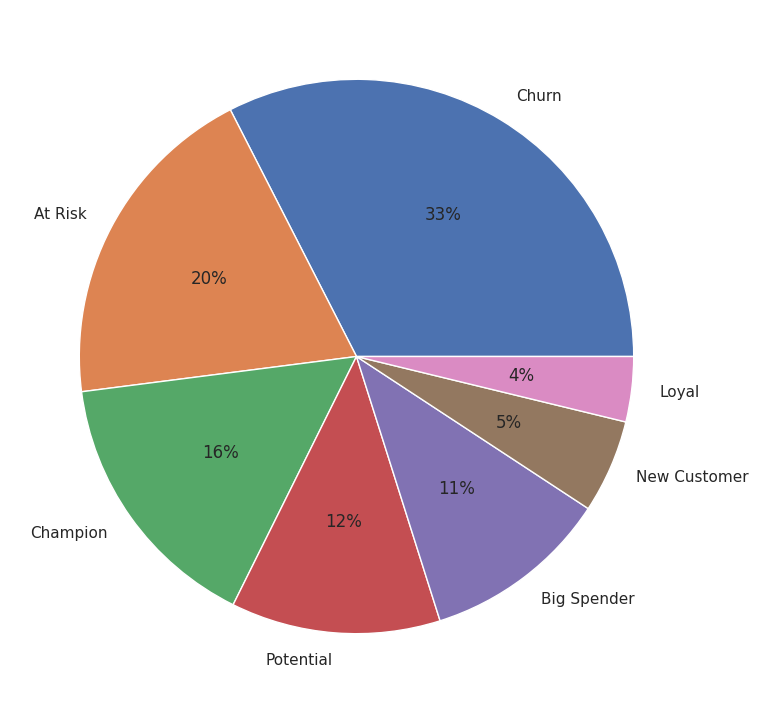

In [ ]:
# I will use a pie plot to display all customer segments

plt.pie(rfm.Segment.value_counts(),
        labels=rfm.Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

# **Clustering**

## **Prepare Data per User**

In [ ]:
datadf.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,aisle,department,user_id,days_since_prior_order
0,120,33120,Organic Egg Whites,eggs,dairy eggs,23750,10.0
1,120,41273,Broccoli Florets,packaged vegetables fruits,produce,23750,10.0
2,120,40545,Berry Medley,frozen produce,frozen,23750,10.0
3,120,28204,Organic Fuji Apple,fresh fruits,produce,23750,10.0
4,120,26604,Organic Blackberries,fresh fruits,produce,23750,10.0


In [ ]:
user = pd.crosstab(datadf['user_id'], datadf['department'])

# this columns are hard to interpret
user =  user.drop(columns = ['other', 'missing'])
user.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,
1,0,0,0,13,3,0,0,13,0,0,0,2,0,0,1,0,0,5,22
2,0,0,2,9,3,0,1,48,21,0,17,0,3,1,11,1,0,36,42
3,0,0,0,3,0,0,0,21,2,4,6,1,0,0,4,0,0,38,9
4,2,0,2,3,0,0,1,0,2,0,3,2,0,0,0,0,0,2,1
5,0,0,0,0,0,0,1,8,1,1,2,0,2,0,2,0,0,19,1


## Combine with RFM

In [ ]:
user = pd.merge(user,rfm[['user_id', 'R', 'F', 'M']], how = 'left', on = 'user_id')
user = user.rename(columns = {'R': 'avg_gaptime', 'F':'order_count', 'M':'quantity'})
user.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
0,1,0,0,0,13,3,0,0,13,0,0,0,2,0,0,1,0,0,5,22,19.000000,11,59
1,2,0,0,2,9,3,0,1,48,21,0,17,0,3,1,11,1,0,36,42,16.285714,15,195
2,3,0,0,0,3,0,0,0,21,2,4,6,1,0,0,4,0,0,38,9,12.000000,13,88
3,4,2,0,2,3,0,0,1,0,2,0,3,2,0,0,0,0,0,2,1,17.000000,6,18
4,5,0,0,0,0,0,0,1,8,1,1,2,0,2,0,2,0,0,19,1,11.500000,5,37


In [ ]:
user.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100000, 23)

In [ ]:
user.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_id', 'alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
       'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta',
       'frozen', 'household', 'international', 'meat seafood', 'pantry',
       'personal care', 'pets', 'produce', 'snacks', 'avg_gaptime',
       'order_count', 'quantity'],
      dtype='object')

In [ ]:
for cat in ['alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
       'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta',
       'frozen', 'household', 'international', 'meat seafood', 'pantry',
       'personal care', 'pets', 'produce', 'snacks']:

       user[cat] = user[cat]/user['quantity']

user.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
0,1,0.000000,0.0,0.000000,0.220339,0.050847,0.0,0.000000,0.220339,0.000000,0.000000,0.000000,0.033898,0.000000,0.000000,0.016949,0.000000,0.0,0.084746,0.372881,19.000000,11,59
1,2,0.000000,0.0,0.010256,0.046154,0.015385,0.0,0.005128,0.246154,0.107692,0.000000,0.087179,0.000000,0.015385,0.005128,0.056410,0.005128,0.0,0.184615,0.215385,16.285714,15,195
2,3,0.000000,0.0,0.000000,0.034091,0.000000,0.0,0.000000,0.238636,0.022727,0.045455,0.068182,0.011364,0.000000,0.000000,0.045455,0.000000,0.0,0.431818,0.102273,12.000000,13,88
3,4,0.111111,0.0,0.111111,0.166667,0.000000,0.0,0.055556,0.000000,0.111111,0.000000,0.166667,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.055556,17.000000,6,18
4,5,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.027027,0.216216,0.027027,0.027027,0.054054,0.000000,0.054054,0.000000,0.054054,0.000000,0.0,0.513514,0.027027,11.500000,5,37


In [ ]:
print(user.shape)
user.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100000, 23)


,user_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.008560,0.009050,0.034700,0.096594,0.021582,0.000971,0.032376,0.156175,0.031263,0.025091,0.071491,0.029144,0.008011,0.022357,0.060664,0.017048,0.003223,0.279091,0.088950,15.426974,16.657420,158.06355
std,28867.657797,0.053779,0.037719,0.044965,0.121769,0.038382,0.007220,0.043023,0.107186,0.044688,0.034666,0.082544,0.064456,0.018441,0.036316,0.060525,0.041479,0.021935,0.183169,0.101317,6.908130,16.715576,204.00877
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.086207,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.138462,0.024240,9.800000,6.000000,39.00000
50%,50000.500000,0.000000,0.000000,0.022680,0.062500,0.006897,0.000000,0.019481,0.145191,0.017857,0.013821,0.050000,0.005076,0.000000,0.008163,0.048780,0.000000,0.000000,0.266667,0.063291,14.937500,10.000000,84.00000
75%,75000.250000,0.000000,0.000000,0.052026,0.126714,0.029412,0.000000,0.048276,0.209302,0.045455,0.037736,0.100000,0.032258,0.009434,0.033058,0.083333,0.017857,0.000000,0.397064,0.119145,20.600000,20.000000,189.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.395349,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.954545,1.000000,1.000000,30.000000,100.000000,2888.00000


In [ ]:
user.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_id', 'alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
       'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta',
       'frozen', 'household', 'international', 'meat seafood', 'pantry',
       'personal care', 'pets', 'produce', 'snacks', 'avg_gaptime',
       'order_count', 'quantity'],
      dtype='object')

## **Preparation to Model**

In [ ]:
numerical_columns = ['alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
       'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta',
       'frozen', 'household', 'international', 'meat seafood', 'pantry',
       'personal care', 'pets', 'produce', 'snacks', 'avg_gaptime',
       'order_count', 'quantity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Scaling**

In [ ]:
cluster = user[numerical_columns]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster[numerical_columns] = scaler.fit_transform(cluster[numerical_columns])

cluster.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-afb89d384571>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster[numerical_columns] = scaler.fit_transform(cluster[numerical_columns])


,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
0,0.000000,0.0,0.000000,0.220339,0.050847,0.0,0.000000,0.220339,0.000000,0.000000,0.000000,0.033898,0.000000,0.000000,0.016949,0.000000,0.0,0.084746,0.372881,0.633333,0.072917,0.019411
1,0.000000,0.0,0.010256,0.046154,0.015385,0.0,0.005128,0.246154,0.107692,0.000000,0.087179,0.000000,0.015385,0.005128,0.056410,0.005128,0.0,0.184615,0.215385,0.542857,0.114583,0.066551
2,0.000000,0.0,0.000000,0.034091,0.000000,0.0,0.000000,0.238636,0.022727,0.054545,0.068182,0.011364,0.000000,0.000000,0.045455,0.000000,0.0,0.431818,0.102273,0.400000,0.093750,0.029463
3,0.111111,0.0,0.111111,0.166667,0.000000,0.0,0.055556,0.000000,0.111111,0.000000,0.166667,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.055556,0.566667,0.020833,0.005199
4,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.027027,0.216216,0.027027,0.032432,0.054054,0.000000,0.054054,0.000000,0.054054,0.000000,0.0,0.513514,0.027027,0.383333,0.010417,0.011785


In [ ]:
cluster.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100000, 22)

## **PCA**

**PCA** is

In [ ]:
temp = 0
n_compo = 1

while temp <0.9: #more than % of the variability in the data can be explained by just n components
  pca = PCA(n_components=n_compo)
  pca_cluster = pca.fit_transform(cluster)
  temp = pca.explained_variance_ratio_.sum()

  print(n_compo, temp)
  n_compo = n_compo+1

# More than 90% of the variability in the data can be explained by just 9 components


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1 0.37021611513450214
2 0.5711004478150915
3 0.6595167572436722
4 0.739333205668549
5 0.7984025643340322
6 0.8449567523453049
7 0.8764598515157794
8 0.8967924962472131
9 0.9132442370575649


In [ ]:
PCA_components = pd.DataFrame(pca_cluster)
print(PCA_components.shape)
PCA_components.head(5)

(100000, 9)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8
0,-0.157550,-0.251222,0.015065,-0.054188,0.077006,-0.261083,0.035061,0.028836,-0.021948
1,-0.036417,-0.093826,0.032387,0.097119,0.069953,-0.103155,0.052002,-0.005571,-0.002894
2,0.090699,0.147743,-0.082966,0.076648,-0.010976,-0.070223,0.039226,0.024125,-0.021101
3,-0.139239,-0.165064,-0.099466,-0.082042,0.047273,0.154136,0.000537,0.064082,0.116888
4,0.067124,0.254908,-0.162223,0.094443,-0.037044,-0.030316,0.014900,0.008091,-0.013203


## **Elbow Method**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

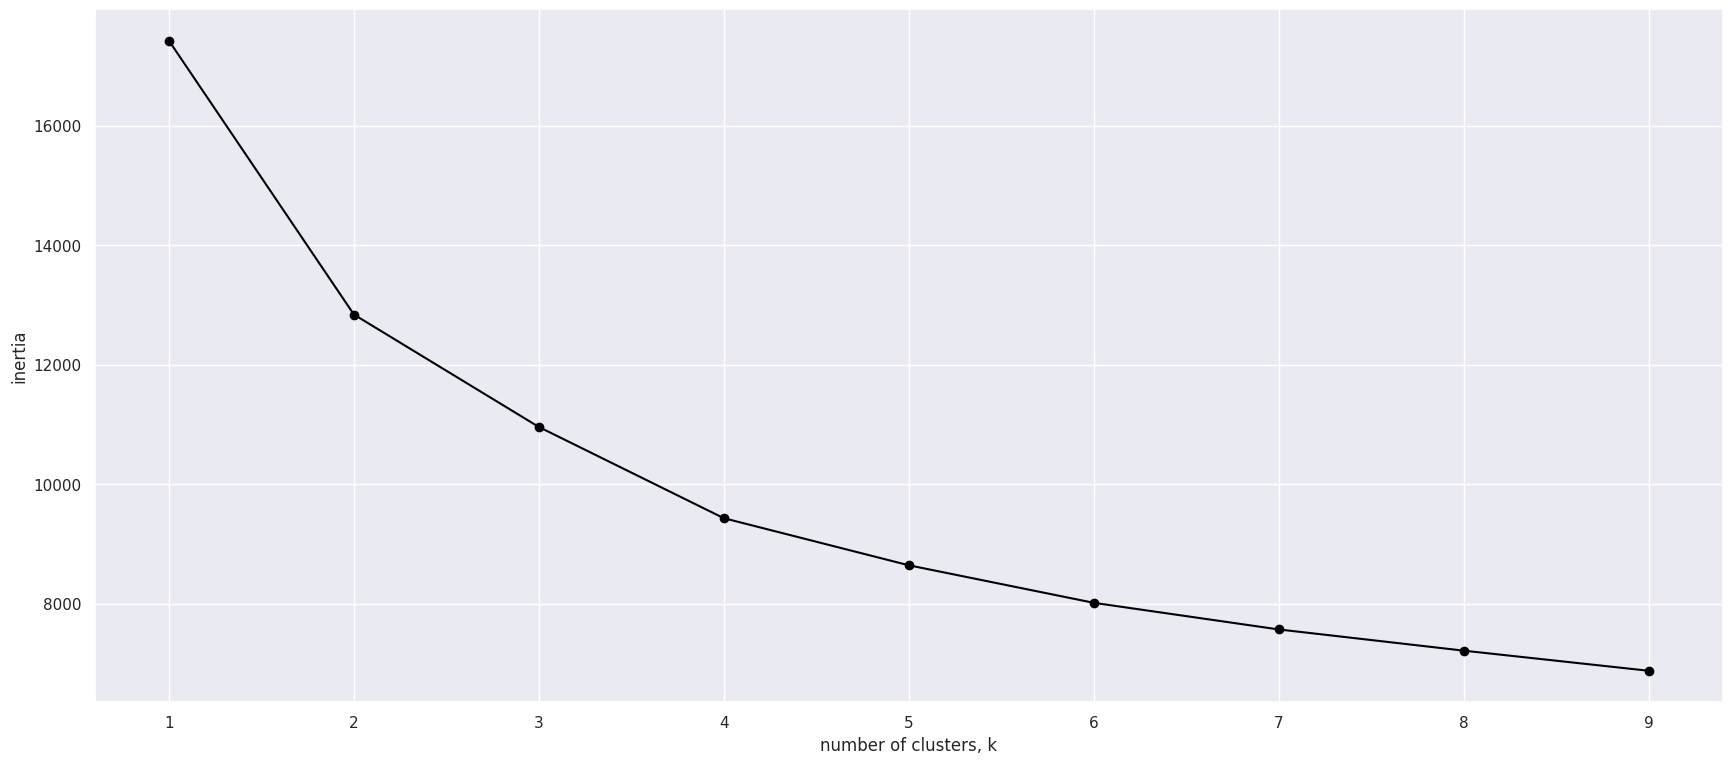

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components)
    inertias.append(model.inertia_)

# Plotting. The plot will give the elbow
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

4 clusters looks good

## **Apply KMeans**

In [ ]:
# KMeans with 4 clusters

cluster_model = KMeans(n_clusters=4)
cluster_model.fit(PCA_components)
cluster_label = cluster_model.labels_
user['cluster'] = cluster_label
user

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity,cluster
0,1,0.000000,0.000000,0.000000,0.220339,0.050847,0.0,0.000000,0.220339,0.000000,0.000000,0.000000,0.033898,0.000000,0.000000,0.016949,0.000000,0.0,0.084746,0.372881,19.000000,11,59,3
1,2,0.000000,0.000000,0.010256,0.046154,0.015385,0.0,0.005128,0.246154,0.107692,0.000000,0.087179,0.000000,0.015385,0.005128,0.056410,0.005128,0.0,0.184615,0.215385,16.285714,15,195,2
2,3,0.000000,0.000000,0.000000,0.034091,0.000000,0.0,0.000000,0.238636,0.022727,0.045455,0.068182,0.011364,0.000000,0.000000,0.045455,0.000000,0.0,0.431818,0.102273,12.000000,13,88,0
3,4,0.111111,0.000000,0.111111,0.166667,0.000000,0.0,0.055556,0.000000,0.111111,0.000000,0.166667,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.055556,17.000000,6,18,2
4,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027027,0.216216,0.027027,0.027027,0.054054,0.000000,0.054054,0.000000,0.054054,0.000000,0.0,0.513514,0.027027,11.500000,5,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,0.000000,0.000000,0.031250,0.046875,0.007812,0.0,0.039062,0.023438,0.015625,0.000000,0.398438,0.015625,0.007812,0.000000,0.023438,0.031250,0.0,0.156250,0.187500,22.833333,13,128,3
99996,99997,0.000000,0.000000,0.078947,0.052632,0.000000,0.0,0.052632,0.184211,0.052632,0.052632,0.105263,0.000000,0.052632,0.000000,0.026316,0.000000,0.0,0.263158,0.078947,24.666667,4,38,3
99997,99998,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.095238,0.000000,0.000000,0.047619,0.047619,0.000000,0.0,0.666667,0.000000,13.000000,6,21,0
99998,99999,0.000000,0.012158,0.021277,0.021277,0.015198,0.0,0.000000,0.227964,0.015198,0.112462,0.027356,0.009119,0.003040,0.042553,0.009119,0.000000,0.0,0.392097,0.088146,7.323529,35,329,1


In [ ]:
user.groupby('cluster', as_index=False)[numerical_columns].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cluster,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
0,0,0.001875,0.004588,0.025338,0.048239,0.013133,0.001236,0.032366,0.132127,0.027278,0.021363,0.047682,0.011467,0.007431,0.023117,0.052108,0.008026,0.000719,0.487813,0.050984,14.411797,13.043271,119.149861
1,1,0.004772,0.013462,0.035901,0.083771,0.020912,0.001384,0.028656,0.177864,0.030796,0.022960,0.059603,0.019969,0.007697,0.020426,0.056022,0.012497,0.002376,0.309375,0.088530,6.587487,53.955425,554.738174
2,2,0.014358,0.011286,0.039788,0.130518,0.026152,0.000754,0.030458,0.167115,0.033097,0.026008,0.085134,0.036568,0.008233,0.021260,0.062893,0.022417,0.004935,0.161989,0.111972,11.823884,14.889585,134.954163
3,3,0.009514,0.008740,0.036716,0.106293,0.024095,0.000818,0.035813,0.156461,0.032842,0.028054,0.081601,0.039614,0.008382,0.023610,0.067235,0.020688,0.003840,0.216144,0.096652,23.424018,7.243575,62.847423


## **Visualize PCA Component and Cluster**

In [ ]:
# Visualization with PCA component only

pca2 = PCA(n_components=2)
pca_cluster2 = pca2.fit_transform(cluster)
print(pca2.explained_variance_ratio_.sum())
PCA_components2 = pd.DataFrame(pca_cluster2)

PCA_components2['cluster'] = cluster_label
PCA_components2



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5711004478150914


,0,1,cluster
0,-0.157550,-0.251222,3
1,-0.036417,-0.093826,2
2,0.090699,0.147743,0
3,-0.139239,-0.165064,2
4,0.067124,0.254908,0
...,...,...,...
99995,-0.247875,-0.107677,3
99996,-0.328755,0.037979,3
99997,0.044583,0.404866,0
99998,0.351993,0.092161,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='0', ylabel='1'>

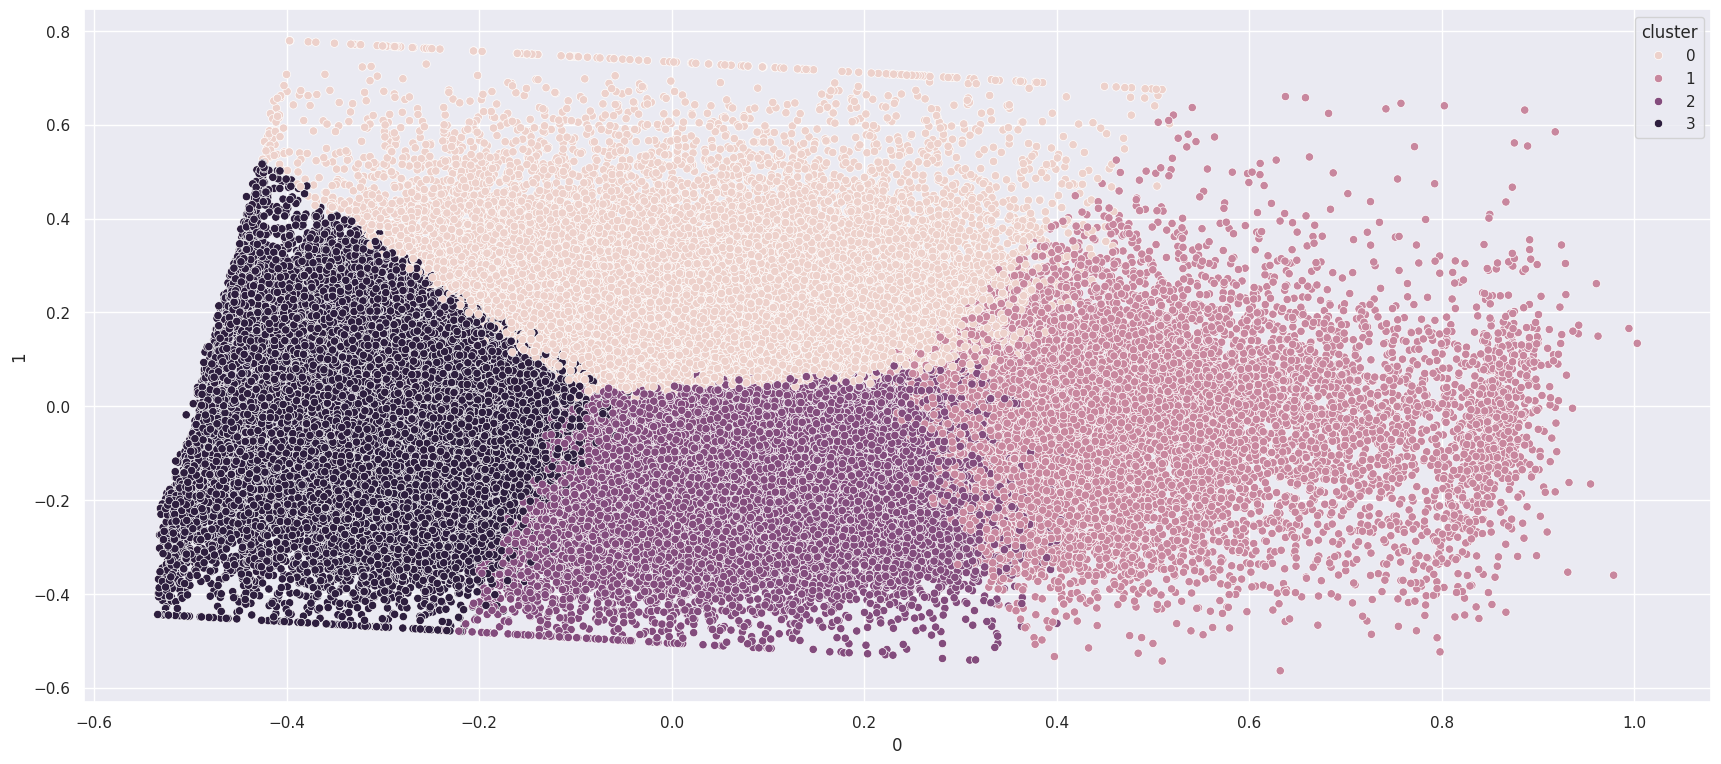

In [ ]:

# Now you can create the scatter plot
sns.scatterplot(x=PCA_components2.iloc[:, 0], y=PCA_components2.iloc[:, 1], data=PCA_components2, hue='cluster')

## **Cluster Persona**

In [ ]:
cluster_summary = user.groupby('cluster', as_index=False)[numerical_columns].mean()
cluster_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cluster,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
0,0,0.001875,0.004588,0.025338,0.048239,0.013133,0.001236,0.032366,0.132127,0.027278,0.021363,0.047682,0.011467,0.007431,0.023117,0.052108,0.008026,0.000719,0.487813,0.050984,14.411797,13.043271,119.149861
1,1,0.004772,0.013462,0.035901,0.083771,0.020912,0.001384,0.028656,0.177864,0.030796,0.022960,0.059603,0.019969,0.007697,0.020426,0.056022,0.012497,0.002376,0.309375,0.088530,6.587487,53.955425,554.738174
2,2,0.014358,0.011286,0.039788,0.130518,0.026152,0.000754,0.030458,0.167115,0.033097,0.026008,0.085134,0.036568,0.008233,0.021260,0.062893,0.022417,0.004935,0.161989,0.111972,11.823884,14.889585,134.954163
3,3,0.009514,0.008740,0.036716,0.106293,0.024095,0.000818,0.035813,0.156461,0.032842,0.028054,0.081601,0.039614,0.008382,0.023610,0.067235,0.020688,0.003840,0.216144,0.096652,23.424018,7.243575,62.847423


In [ ]:
user.groupby('cluster', as_index=False)['user_id'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cluster,user_id
0,0,25537
1,1,11733
2,2,32070
3,3,30660


In [ ]:
cluster_summary.loc['mean'] = cluster_summary.mean()
#cluster_summary = cluster_summary.reset_index()

cluster_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cluster,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,pantry,personal care,pets,produce,snacks,avg_gaptime,order_count,quantity
0,0.0,0.001875,0.004588,0.025338,0.048239,0.013133,0.001236,0.032366,0.132127,0.027278,0.021363,0.047682,0.011467,0.007431,0.023117,0.052108,0.008026,0.000719,0.487813,0.050984,14.411797,13.043271,119.149861
1,1.0,0.004772,0.013462,0.035901,0.083771,0.020912,0.001384,0.028656,0.177864,0.030796,0.022960,0.059603,0.019969,0.007697,0.020426,0.056022,0.012497,0.002376,0.309375,0.088530,6.587487,53.955425,554.738174
2,2.0,0.014358,0.011286,0.039788,0.130518,0.026152,0.000754,0.030458,0.167115,0.033097,0.026008,0.085134,0.036568,0.008233,0.021260,0.062893,0.022417,0.004935,0.161989,0.111972,11.823884,14.889585,134.954163
3,3.0,0.009514,0.008740,0.036716,0.106293,0.024095,0.000818,0.035813,0.156461,0.032842,0.028054,0.081601,0.039614,0.008382,0.023610,0.067235,0.020688,0.003840,0.216144,0.096652,23.424018,7.243575,62.847423
mean,1.5,0.007630,0.009519,0.034436,0.092205,0.021073,0.001048,0.031823,0.158392,0.031003,0.024596,0.068505,0.026904,0.007935,0.022103,0.059565,0.015907,0.002968,0.293830,0.087035,14.061796,22.282964,217.922405


In [ ]:
cluster_summary = cluster_summary.T.reset_index()
cluster_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,0,1,2,3,mean
0,cluster,0.000000,1.000000,2.000000,3.000000,1.500000
1,alcohol,0.001875,0.004772,0.014358,0.009514,0.007630
2,babies,0.004588,0.013462,0.011286,0.008740,0.009519
3,bakery,0.025338,0.035901,0.039788,0.036716,0.034436
4,beverages,0.048239,0.083771,0.130518,0.106293,0.092205
5,breakfast,0.013133,0.020912,0.026152,0.024095,0.021073
6,bulk,0.001236,0.001384,0.000754,0.000818,0.001048
7,canned goods,0.032366,0.028656,0.030458,0.035813,0.031823
8,dairy eggs,0.132127,0.177864,0.167115,0.156461,0.158392
9,deli,0.027278,0.030796,0.033097,0.032842,0.031003


In [ ]:
for i in range(4):
  cluster_summary[f'diff_{i}'] = (cluster_summary[i]/cluster_summary['mean'])-1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cluster_summary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,0,1,2,3,mean,diff_0,diff_1,diff_2,diff_3
0,cluster,0.000000,1.000000,2.000000,3.000000,1.500000,-1.000000,-0.333333,0.333333,1.000000
1,alcohol,0.001875,0.004772,0.014358,0.009514,0.007630,-0.754265,-0.374590,0.881901,0.246955
2,babies,0.004588,0.013462,0.011286,0.008740,0.009519,-0.518011,0.414242,0.185610,-0.081841
3,bakery,0.025338,0.035901,0.039788,0.036716,0.034436,-0.264208,0.042560,0.155424,0.066225
4,beverages,0.048239,0.083771,0.130518,0.106293,0.092205,-0.476832,-0.091468,0.415513,0.152786
5,breakfast,0.013133,0.020912,0.026152,0.024095,0.021073,-0.376793,-0.007637,0.241015,0.143415
6,bulk,0.001236,0.001384,0.000754,0.000818,0.001048,0.179366,0.320335,-0.280300,-0.219401
7,canned goods,0.032366,0.028656,0.030458,0.035813,0.031823,0.017041,-0.099511,-0.042888,0.125359
8,dairy eggs,0.132127,0.177864,0.167115,0.156461,0.158392,-0.165824,0.122937,0.055075,-0.012188
9,deli,0.027278,0.030796,0.033097,0.032842,0.031003,-0.120154,-0.006683,0.067520,0.059317


In [ ]:
cluster_summary.to_csv('cluster_summary.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Interpretation**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


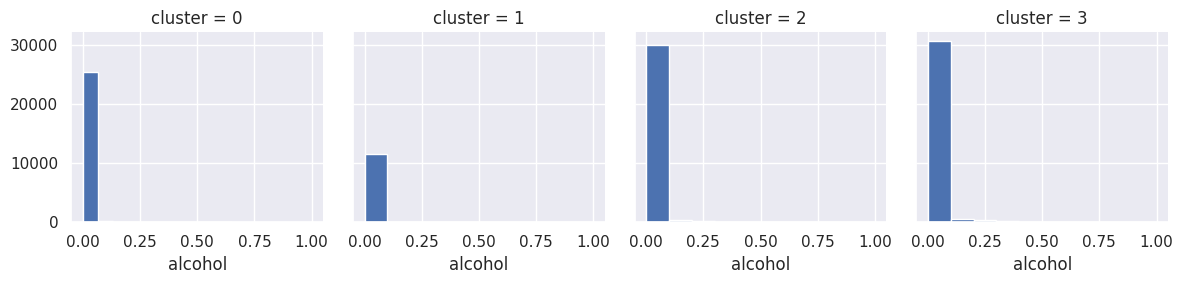

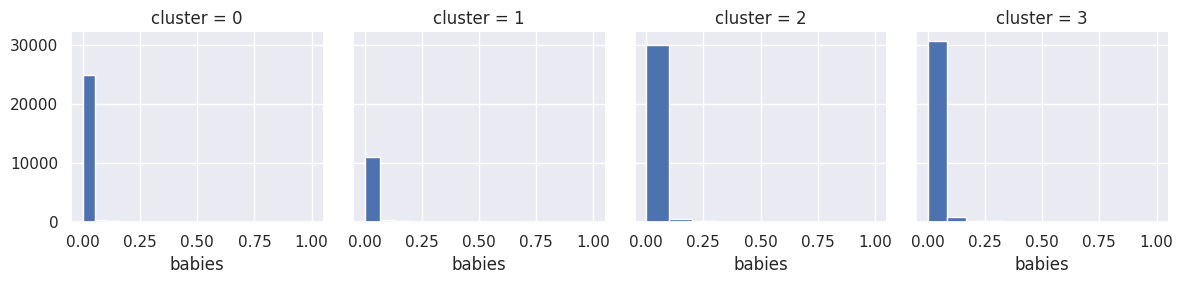

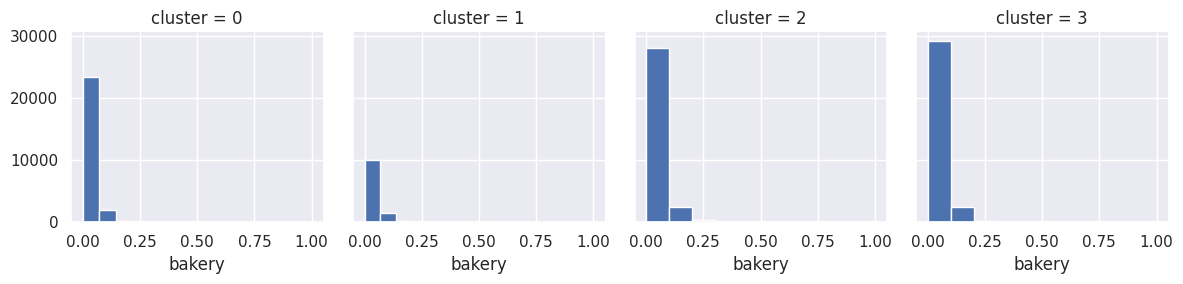

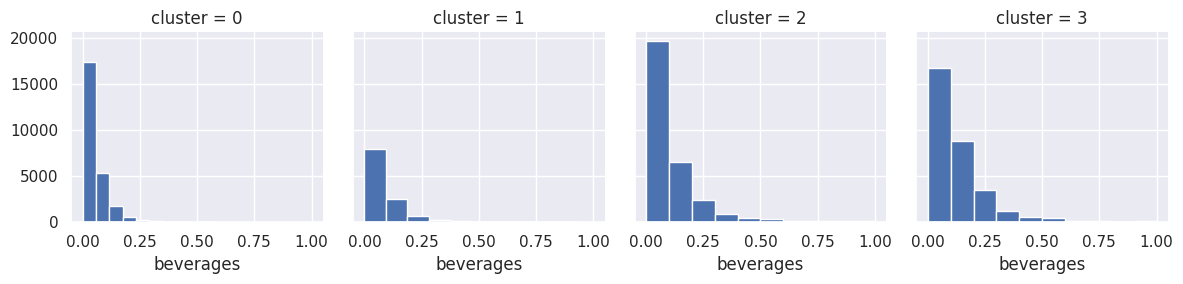

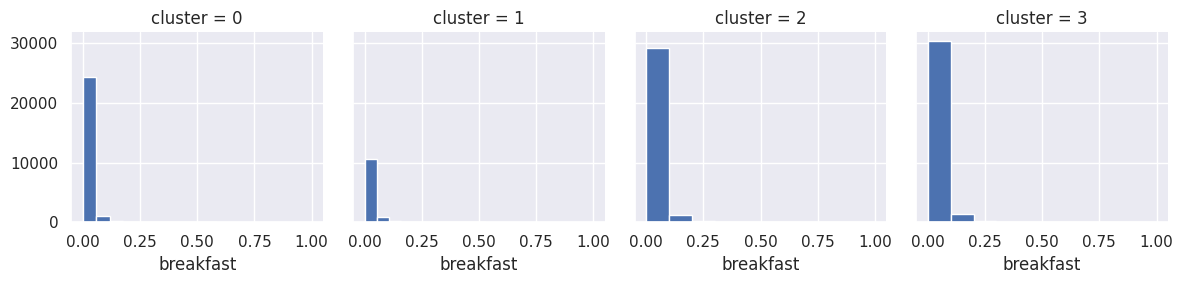

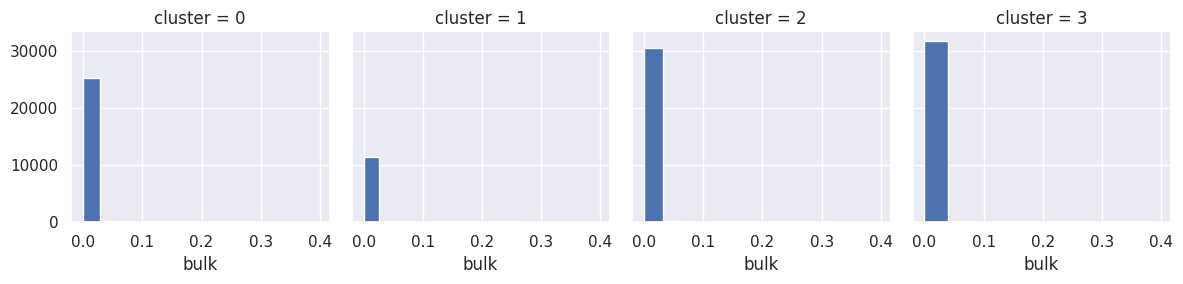

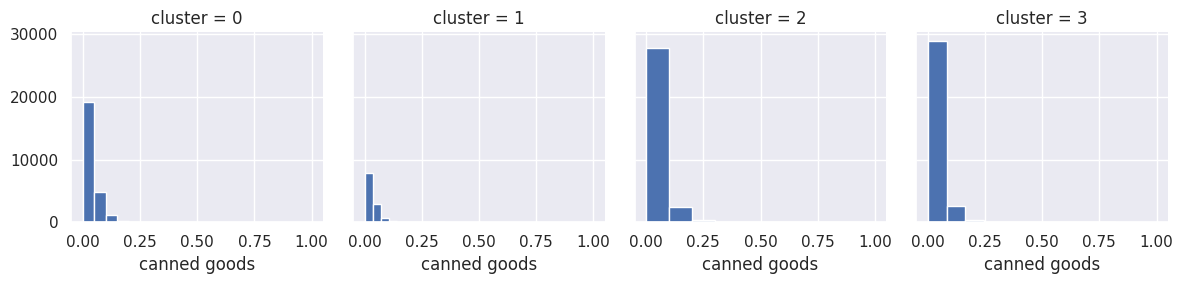

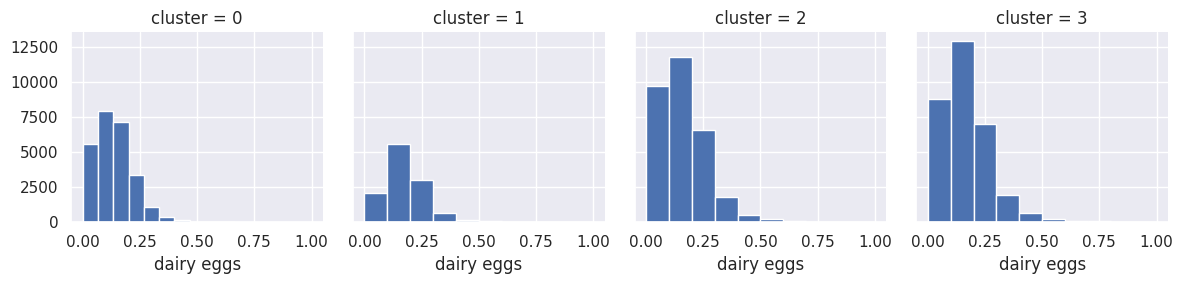

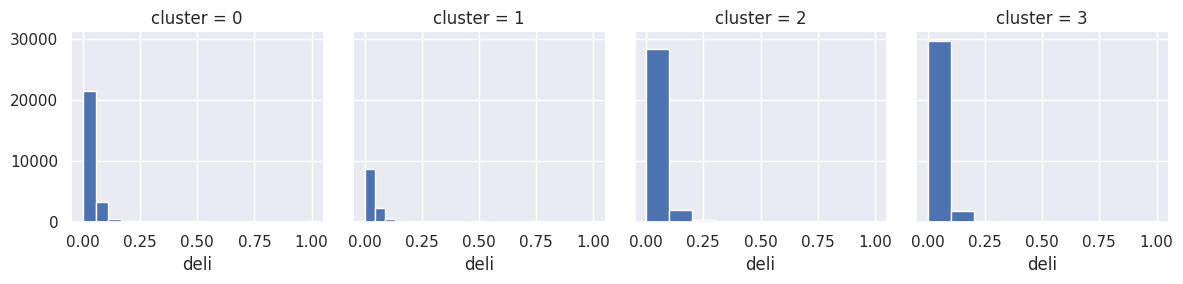

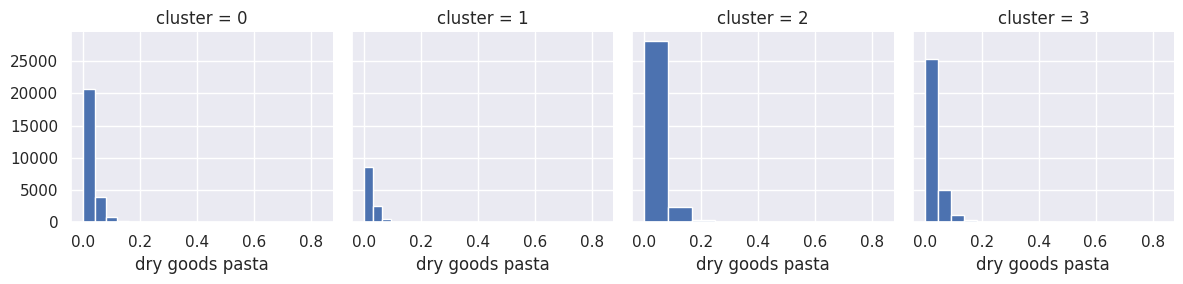

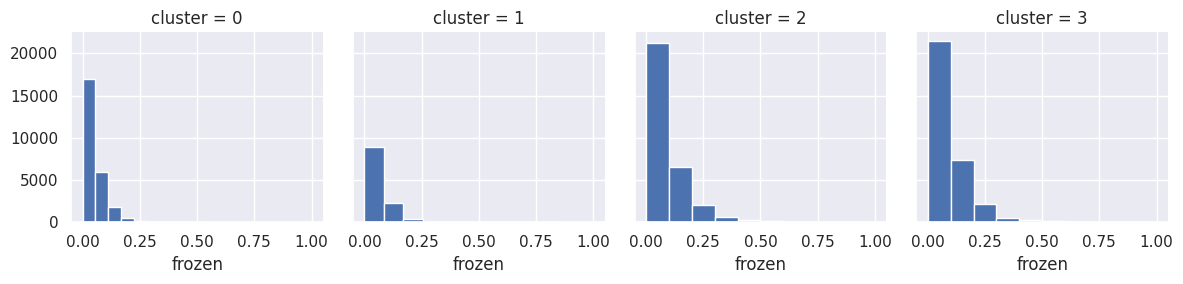

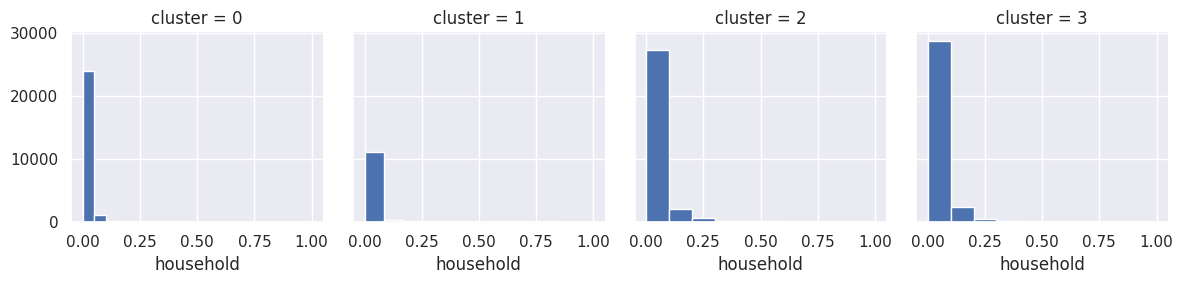

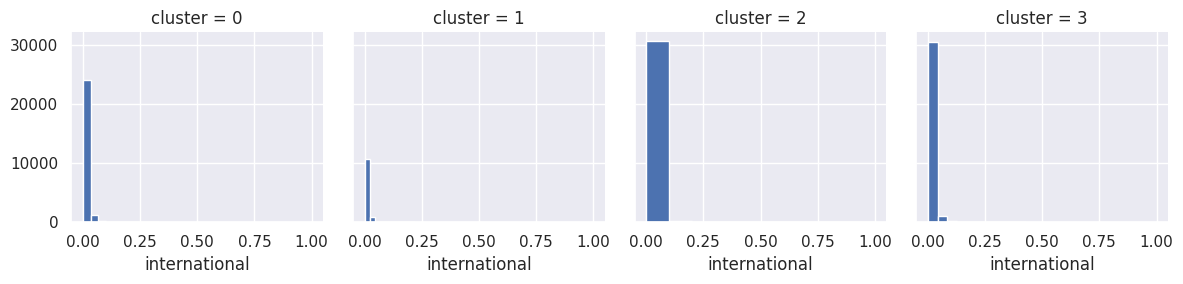

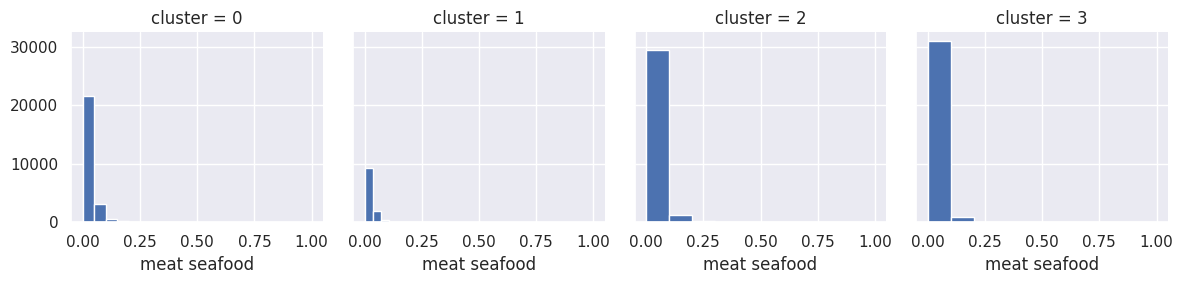

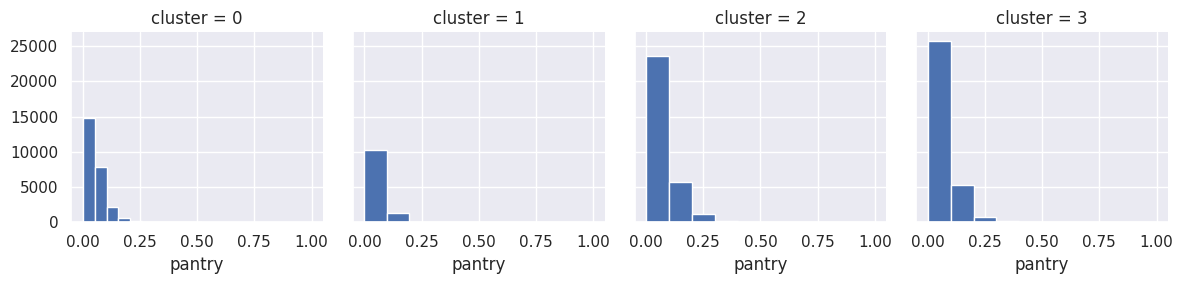

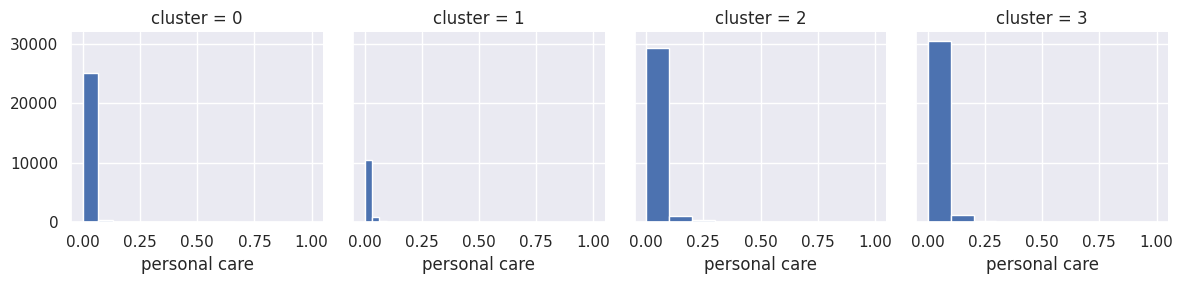

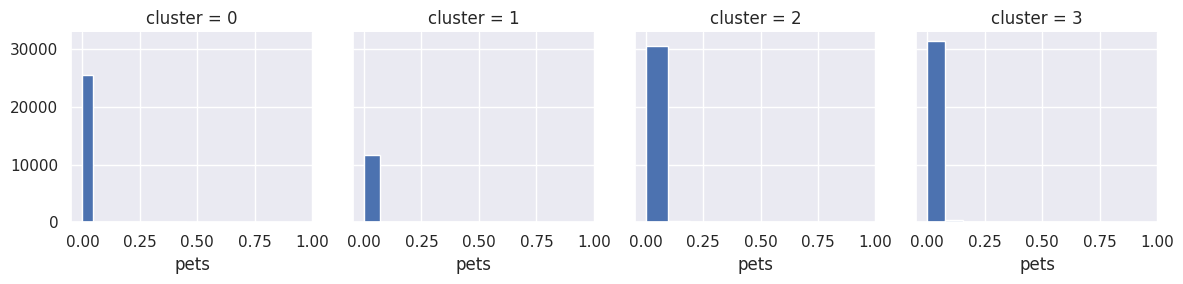

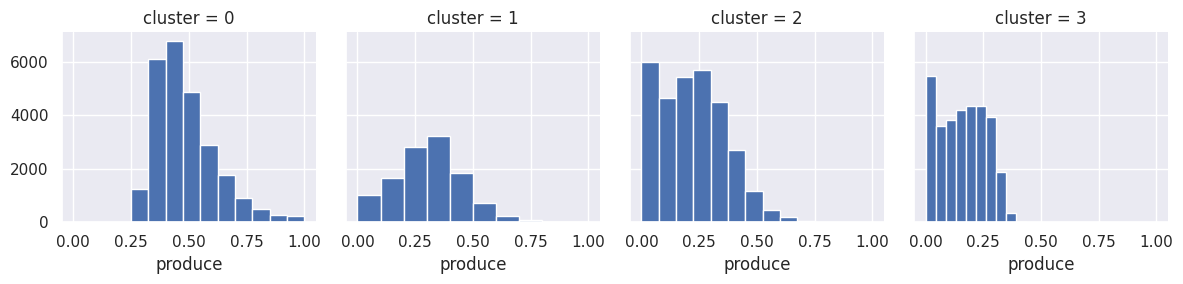

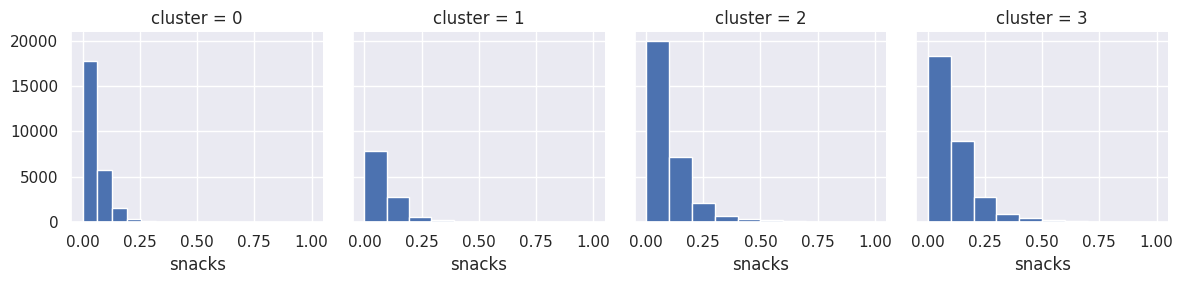

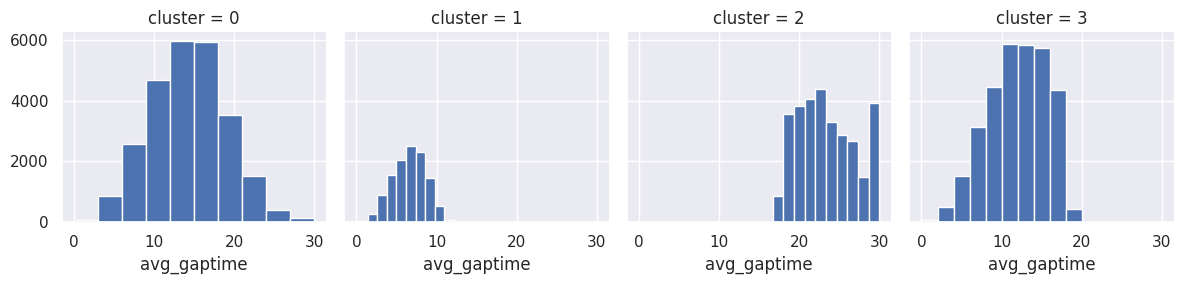

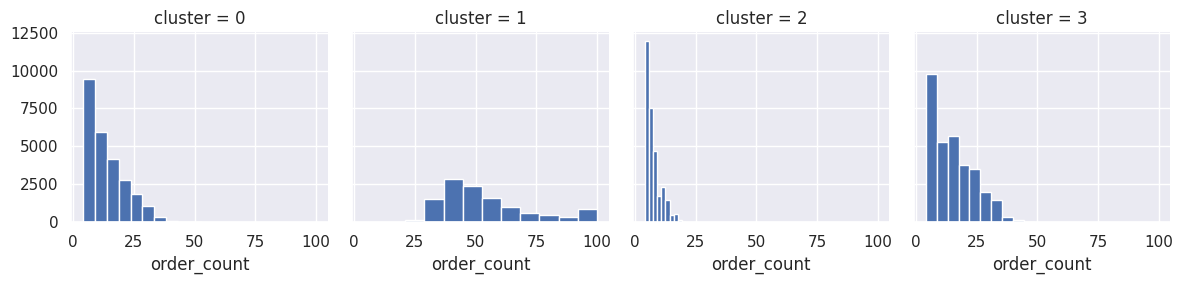

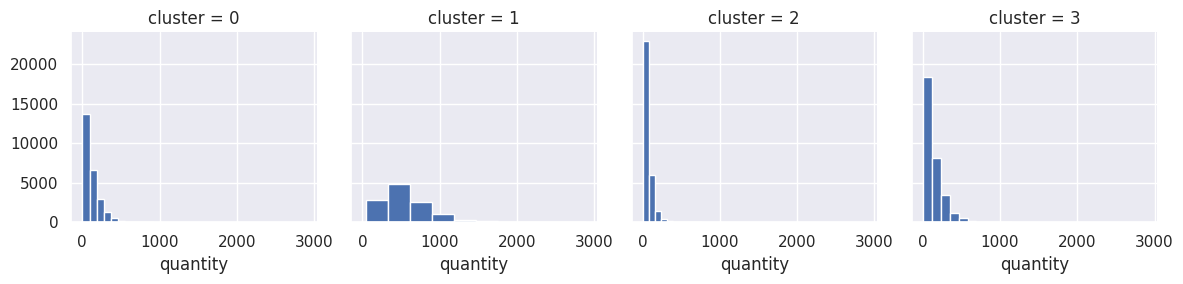

In [ ]:
# another way to interpret, but with viz

for c in numerical_columns:
  grid= sns.FacetGrid(user, col='cluster')
  grid.map(plt.hist, c)

In [ ]:
user.to_csv('user.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Cluster 0**

Cluster 0 - 32195

Profile: **had quite a time for shopping, average frequency and amount. a baby (maybe more kids too), a pet, a working husband, and a home wife, prefer to eat at home (cook/homemade therefore the percentage of bakery, beverages, breakfast, dairy eggs, deli, dry good pasta, frozen are high).**
+ High order in alcohol 87.8%
+ high order in babies 18.8%
+ high order in bakery 15.6%
+ high order in beverages 41%
+ a little bit high in dairy eggs, deli, dry goods pasta
+ High order in frozen food 24%
+ high order in households 35%
+ international goods, pantry a little bit
+ Higher order in personal care
+ higher order in pets
_ avg gap time 16 days
- lower order count than other
- lower quantity compare to the average


### **Cluster 1**

Cluster 1 - 11736

Profile: **had the longest range of shopping time, because by once they shop, they prefer to buy in bulk or heavy quantity/amount. New families with babies with pets, order food outside (Uber Eats) occasionally.**
- lower order in alcohol -37%
+ high order in babies 41%
+ high order in bulk 32%
+ high order in dairy eggs 12%
+ high order in personal care 21%
+ high order in pets 21%
+ a little high order in bakery, produce, snack
- a little lower in beverages, canned goods, dry good pasta, frozen, household, international, meat seafood.
- lower gap time than average
- highest order count and quantity

### **Cluster 2**

Cluster 2 - 30626

Profile: **come back in recent days, a short period of shopping time, lowest of frequency (might be influenced by store facilities such as online services, or have other options of store based on discount), Big family, shopping for monthly groceries, priority in family need, such as food and household. the women who do the groceries. kids are already grown up, not a baby.**
+ higher order 25% alcohol
+ high order in beverages 16%
+ high order in breakfast 14.5%
+ high order in  canned goods 12.5%
+ high order in dry good pasta 15%
+ high order in households 48%
+ high order in pantry 13%
+ high order in personal care 30%
+ high order in pets 30%
+ high order in snack 11%
- a little bit higher in bakery, deli, international, meat
- lower in babies, bulk, dairy eggs, produce
+ higher than average 66%
- order count lower than average -67%
- quantity lower than average -71%

### **Cluster 3**

Cluster 3 - 25443

Profile: **single, healthy addict, active in sport (or diet), buys in the short time range, has other options of shopping place, buy in low quantity, as produce goods and meat seafood easily gone bad in a short time, and for bulk goods need time (in 1 month at least).**
- lower alcohol to -75%
- lower order in babies -52%
- lower in bakery 26%
- lower in beverages -47%
- lower in breakfast -37%
- lowe in dairy eggs -16%
- lower in deli -12%
- lower in dry pasta -13%
- lower in frozen -30%
- lower in household -57%
- lower in international -6%
- lowe in pantry -13%
- lower in personal care by 50%
- lower in parts 75%
- lower in snacks -41%
+ high order in bulk 17%
+ a little bit in canned goods, meat seafood,
+ high order in produce 66%
+ a little bit high of avg times
- lower in order count -41%
- lower in quantity -45%

# **Association Rules**

In [ ]:
datadf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,aisle,department,user_id,days_since_prior_order
0,120,33120,Organic Egg Whites,eggs,dairy eggs,23750,10.0
1,120,41273,Broccoli Florets,packaged vegetables fruits,produce,23750,10.0
2,120,40545,Berry Medley,frozen produce,frozen,23750,10.0
3,120,28204,Organic Fuji Apple,fresh fruits,produce,23750,10.0
4,120,26604,Organic Blackberries,fresh fruits,produce,23750,10.0


In [ ]:
def encode_vectorized(x):
    return (x > 0).astype(int)

basket = pd.crosstab(datadf['order_id'], datadf['department'])
basket = encode_vectorized(basket)
print(basket.shape)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1565742, 21)


department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
14,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
15,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [ ]:
def encode(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

basket = pd.crosstab(datadf['order_id'],datadf['department'])
basket = basket.applymap(encode)
print(basket.shape)
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'pd' is not defined

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# try from high support threshold

frequent_items = apriori(basket, min_support = 0.01,use_colnames = True)
frequent_items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# A lift value greater than 1 indicates that the rule body and the rule head appear more often together
# this mean that the occurence of the rule body has a positive effect on the occurence of the rule

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules

In [ ]:
# the only column we will used
rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']]

#transform frozenset
rules["antecedent"] = rules["antecendt"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules

In [ ]:
# add count intem antecedents
rules['item_antecedent'] = rules['antecedents'].str.count('\,') +1

rules.sort_values('confidence', ascending = False, inplace = True)
rules

## **Cluster 1**

In [ ]:
# Check by rules

rules[(rules['antecedents'].astype(str).str.contains('houshold')) &
      (rules['antecedent'].astype(str).str.contains('personal')) &
      (rules['item_antecedents'] == 2)].head(10)

# **HERE**